A

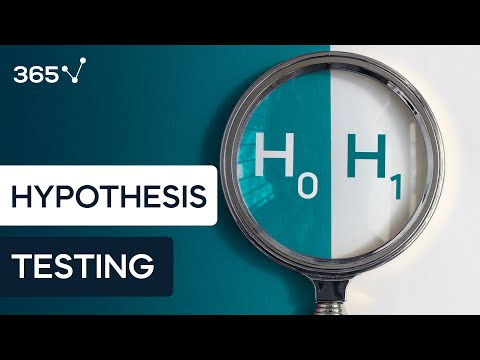

In [1]:
from IPython.display import YouTubeVideo
# First pre-lecture video: 
# "Hypothesis testing. Null vs alternative
# https://www.youtube.com/watch?v=ZzeXCKd5a18
YouTubeVideo('ZzeXCKd5a18', width=800, height=500)

A hypothesis is an idea that can be tested.

B

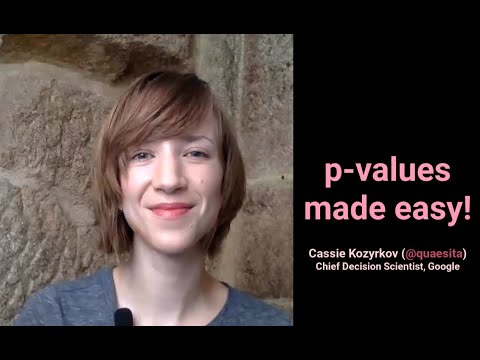

In [2]:
from IPython.display import YouTubeVideo
# Second pre-lecture video
# "What is a p-value"
# https://www.youtube.com/watch?v=9jW9G8MO4PQ
YouTubeVideo('9jW9G8MO4PQ', width=800, height=500)

So the p-value is the assumption that you make to make the null hypothesis true.

1

•If the idea can be compared with another statement which define your idea, your idea will become a hypothesis. So the key factor is the data that can back up the idea.

•I think the key "criteria" is whether the hypothesis sounds ridiculous or not.

• The null and alternative hypothesises are opposites of each other.

2

What we can get from the test outcomes is the sample mean which we can use to estimate the mean value of the real mean. 𝜇0 is what you guess the mean will be and 𝜇 is the mean in fact but we can not know this value because it need a lot of data which we have no access to gain. So we can use test to have data about sample and we can use these data toestimate the result in population.

3

When we calculate the p-value, we prefer to assume that the null hypothesis is true which we can say is to "imagine a world where the null hypothesis is true". Next, we observe the sample mean, if it distribute at extremes of the gragh or different from the hypothesis dramatically, we can reject the null hypothesis in this case.

4

If the p-value is smaller, then we can say that the null hypothesis is less likely to be true. So makes it more ridiculous.

5

Simulated p-value: 0.0003


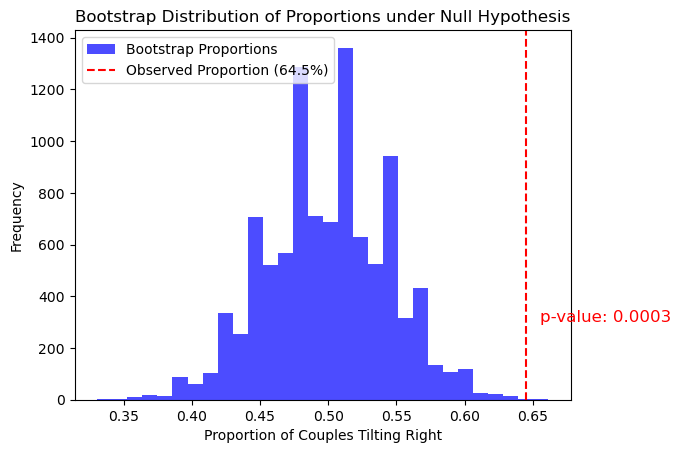

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Observed data
observed_successes = 80  # 80 couples tilted their heads to the right
total_trials = 124       # Total couples observed
observed_proportion = observed_successes / total_trials

# Null hypothesis proportion (no preference, 50/50 coin flip model)
null_hypothesis_proportion = 0.5

# Number of bootstrap samples
num_simulations = 10000

# Generate bootstrap samples under the null hypothesis
bootstrap_proportions = np.random.binomial(n=total_trials, p=null_hypothesis_proportion, size=num_simulations) / total_trials

# Calculate the p-value
p_value = np.sum(bootstrap_proportions >= observed_proportion) / num_simulations

# Print the p-value
print(f"Simulated p-value: {p_value}")

# Plot the distribution of bootstrap proportions
plt.hist(bootstrap_proportions, bins=30, alpha=0.7, color='blue', label="Bootstrap Proportions")
plt.axvline(x=observed_proportion, color='red', linestyle='--', label="Observed Proportion (64.5%)")
plt.title("Bootstrap Distribution of Proportions under Null Hypothesis")
plt.xlabel("Proportion of Couples Tilting Right")
plt.ylabel("Frequency")
plt.legend()

# Annotate the p-value on the plot
plt.text(observed_proportion + 0.01, 300, f'p-value: {p_value:.4f}', color='red', fontsize=12)

# Show the plot
plt.show()


The p-value is 0.0003 < 0.01, so there is a very strong evidence against the null hypothesis.

Here’s a summary of what the Python code does:

1. **Observed Data:** It uses the observed data that 80 out of 124 couples tilted their heads to the right, which is about 64.5%.

2. **Null Hypothesis:** The null hypothesis assumes a 50/50 chance (like flipping a coin) for head tilting, meaning no preference for right or left.

3. **Bootstrap Simulation:** The code simulates 10,000 trials under the null hypothesis, where for each trial it calculates the proportion of "successes" (right head tilts) out of 124 couples.

4. **Calculate p-value:** The p-value is calculated as the proportion of simulated trials where the proportion of right head tilts is greater than or equal to the observed 64.5%.

5. **Visualization:** It generates a histogram of the simulated proportions, with the observed proportion of 64.5% marked by a red dashed line. The calculated p-value is displayed both on the plot and printed in the console.

You can use this code to understand the strength of evidence against the null hypothesis based on your data.

Transcript with Chatgpt--https://chatgpt.com/c/6706cdc7-76d8-800a-84dc-605b88504e9f

6

A smaller p-value cannot definitively prove that the null hypothesis is false.

And we cannot prove Fido is innocent or not with p-value. Because p-value only shows the possibility of the null hypothesis. 

No matter the p-value is high or low, we cannot draw a conclusion from it.

7

In one-sided test, whether the p-value is bigger than we expected unfer the null hypothesis is what we concerned. While in two-sided test, we have to observe the p-value is approaching to the extreme(two extremes)or not.

We do expect that the p-value in one-sided test is smaller than that in two-sided test. Because the data are more focused on deviations in one direction.

### What Changed in the Code

In the two-sided test version of the code, we made the following changes:

1. **Considered Extremes in Both Directions**:
   - In the one-sided test, we were only interested in whether the proportion of improvements was greater than expected under the null hypothesis. In the two-sided test, we are now considering **both** directions: whether the observed proportion of improvements is **either greater than or less than** what would be expected under the null hypothesis. 

   - This is implemented in the line:
     ```python
     extreme_simulations = np.abs(IncreaseProportionSimulations_underH0random - 0.5) >= np.abs(observed_proportion - 0.5)
     ```
     Here, we compute the absolute differences between the simulated and observed proportions and check if they are as extreme or more extreme than the observed proportion in either direction.

2. **P-Value Calculation**:
   - For the one-sided test, we only considered values that were extreme in **one direction** (e.g., greater than the observed proportion). 
   - In the two-sided test, the p-value now considers **both directions**, calculating how often the simulated results are as extreme or more extreme than the observed proportion, regardless of whether the deviation is above or below the expected value.

   - The p-value is computed as:
     ```python
     two_sided_p_value = np.mean(extreme_simulations)
     ```
     This calculates the proportion of simulated results that are as extreme or more extreme than the observed statistic in **both directions**.

### How This Changes the Interpretation of the Hypothesis Test

- **One-Sided Test**: 
  - In the one-sided test, you're only testing whether the observed proportion of improvements is **greater than** what you'd expect under the null hypothesis. This approach is more specific and focuses on deviations in one direction. 
  - A one-sided test is used when you have a clear reason to believe that any effect will occur in only one direction (e.g., the vaccine can only **increase** improvement, not decrease it).
  
- **Two-Sided Test**: 
  - In the two-sided test, you're testing whether the observed proportion of improvements is **different** from what you'd expect under the null hypothesis, **in either direction**. 
  - This is a more general approach and is typically used when you're open to the possibility that deviations could go either way (improvement could be significantly higher or lower than expected).
  - The two-sided test is more conservative because it divides your level of significance (\(\alpha\)) between both tails of the distribution.

### Should We Expect the P-Value to Be Smaller in a One-Tailed Test?

Yes, we typically expect the p-value to be **smaller** in a one-tailed test compared to a two-tailed test, assuming the observed result is in the direction of the alternative hypothesis. Here's why:

- **One-Tailed Test**: 
  - The one-tailed test is more focused, so you're only considering the probability of deviations in one direction (e.g., only values greater than the null hypothesis). If the observed effect is in the predicted direction, you're more likely to get a small p-value because you're concentrating all the probability on one side of the distribution.
  
- **Two-Tailed Test**: 
  - In the two-tailed test, you're considering deviations in both directions (greater or less than the null hypothesis value), which splits the probability between two sides. This makes it harder to reach significance, and the p-value is generally larger because you're effectively doubling the "range" of outcomes that need to be considered.

### Summary:

- **Code Changes**: We now consider deviations in both directions (greater or less than expected), and we calculate the p-value based on these two tails.
- **Interpretation Change**: The one-tailed test only considers deviations in one direction (typically if the proportion is greater than expected), while the two-tailed test considers deviations in both directions (greater or less than expected).
- **P-Value Comparison**: The p-value for a one-tailed test is usually smaller than that of a two-tailed test, assuming the observed result is in the direction of the alternative hypothesis. This is because the one-tailed test focuses on one side of the distribution.

Transcript with Chatgpt--https://chatgpt.com/c/6706d376-b5b8-800a-8f1e-c58a97d1a94e

8

### Problem Introduction

This experiment is based on the Fisher's tea experiment, Fisher made 8 cups of tea with milk to test the ability of distinguish tea or milk is poured first of Dr. Bristol. In current experiment, we tested 80 STA130 students and 49 of them can distinguish successfully. Our experiment has a broader scale than Fisher's experiment.

For the experiment, the null hypothesis is students can identify the tea correctly without gussing and p=0.5.

The alternative hypothesis is p>0.5.

### Quantitative Analysis

I use one-sided test method and bootsrapping method because the ability to discriminate is a black and white proposition.

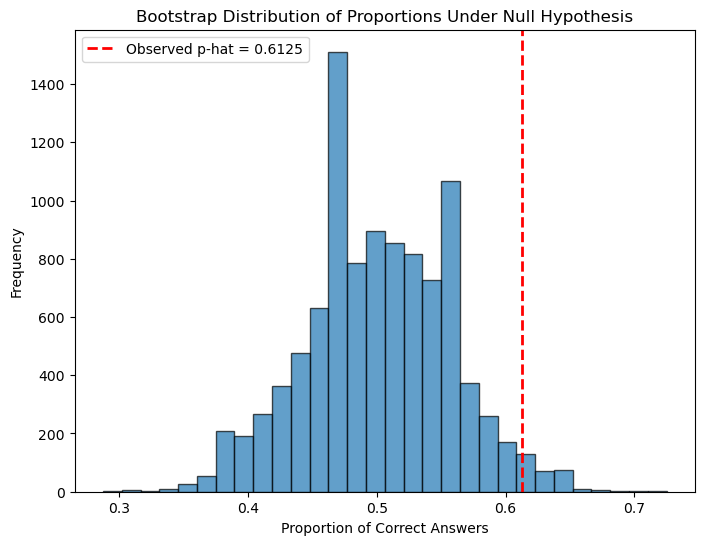

0.0298

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(130)

# Sample data
n = 80  # number of students
x = 49  # number of correct identifications
p_hat = x / n  # observed sample proportion
p_0 = 0.5  # null hypothesis proportion (random guessing)

# Number of bootstrap simulations
num_simulations = 10000

# Simulate the null distribution by bootstrapping
simulated_counts = np.random.binomial(n, p_0, size=num_simulations)
simulated_proportions = simulated_counts / n

# Calculate the proportion of bootstrap samples with a sample proportion >= observed sample proportion (one-tailed test)
p_value_bootstrap = np.mean(simulated_counts >= x)

# Visualization: histogram of the bootstrap distribution
plt.figure(figsize=(8, 6))
plt.hist(simulated_proportions, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(p_hat, color='red', linestyle='dashed', linewidth=2, label=f'Observed p-hat = {p_hat:.4f}')
plt.title('Bootstrap Distribution of Proportions Under Null Hypothesis')
plt.xlabel('Proportion of Correct Answers')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Print the bootstrap p-value
p_value_bootstrap


### Findings and Discussion

The p-value from the bootstrapping analysis tells us the likelihood of observing 49 or more correct answers out of 80 if the students were just guessing (i.e., had a 50% chance of getting it right).

According to the p-value, I draw a conclusion that students do not have the ability to identify whether the tea poured first or the milk with a m medium possibility.

Transcript with Chatgpt--https://chatgpt.com/c/6706da32-ca68-800a-a5a2-bbd6204efaff

9

Yes